In [1]:
import numpy as np
import pandas as pd
import os
import cv2
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load Data Mapping
proj_dir = '/Users/jetcalz07/Desktop/projects/sf_dd/'
train_data = '/Users/jetcalz07/Desktop/projects/sf_dd/data/imgs/train/'
drivers = pd.read_csv(proj_dir + 'data/driver_imgs_list.csv')
drivers.head()

,subject,classname,img
0,p002,c0,img_44733.jpg
1,p002,c0,img_72999.jpg
2,p002,c0,img_25094.jpg
3,p002,c0,img_69092.jpg
4,p002,c0,img_92629.jpg


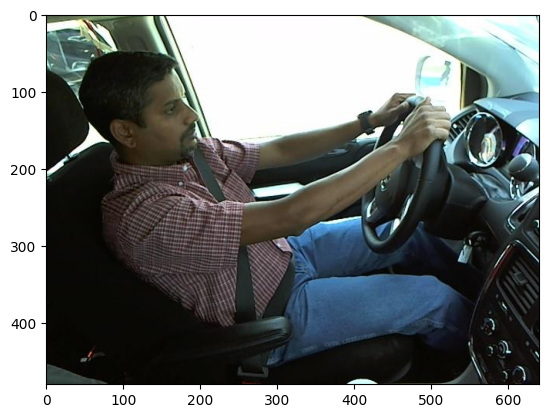

In [3]:
# Load sample images
sample_img = plt.imread(proj_dir + 'data/imgs/train/c0/img_34.jpg')
plt.imshow(sample_img)

c0: focus


<Figure size 640x480 with 0 Axes>

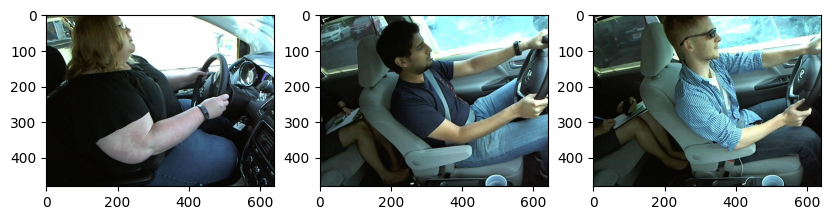

c1: text_r


<Figure size 640x480 with 0 Axes>

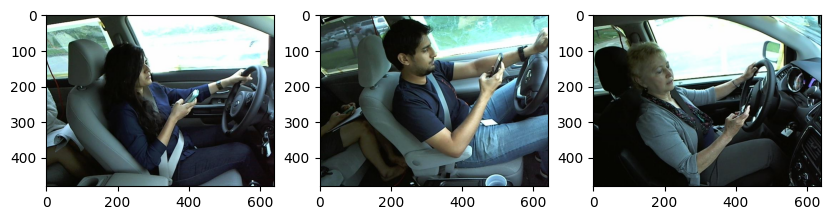

c2: call_r


<Figure size 640x480 with 0 Axes>

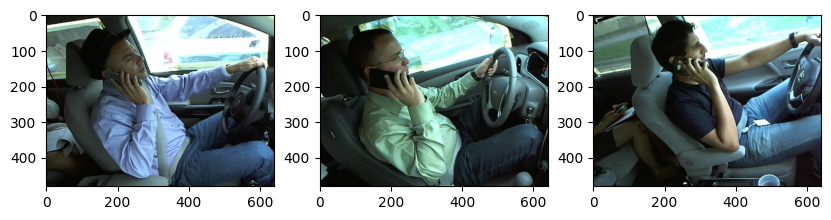

c3: text_l


<Figure size 640x480 with 0 Axes>

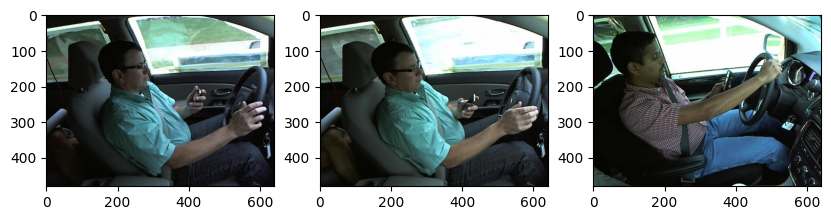

c4: call_l


<Figure size 640x480 with 0 Axes>

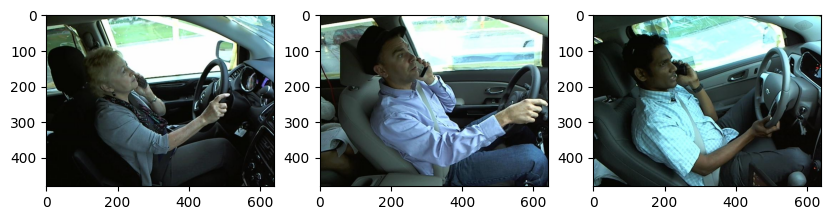

c5: reach_fwd


<Figure size 640x480 with 0 Axes>

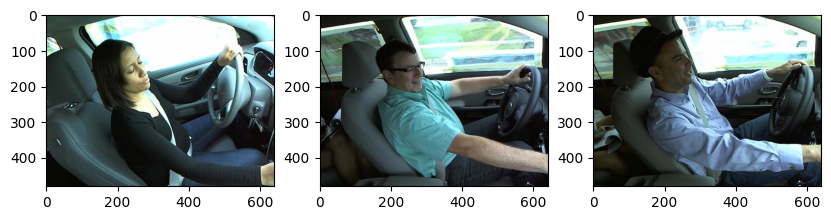

c6: drink


<Figure size 640x480 with 0 Axes>

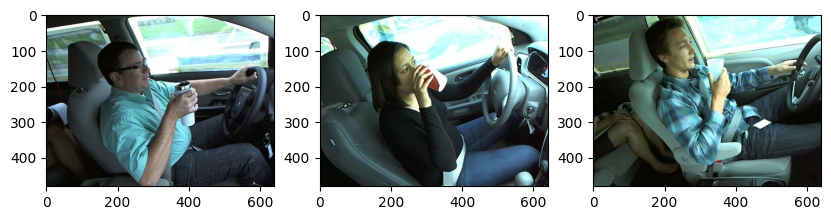

c7: reach_bck


<Figure size 640x480 with 0 Axes>

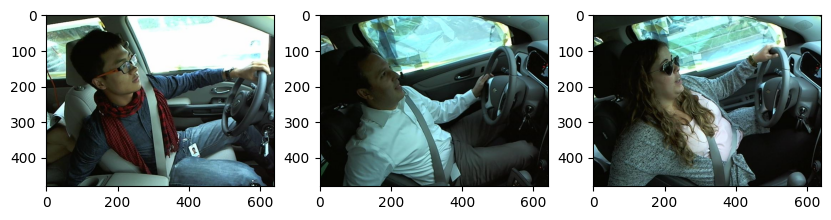

c8: touch_face


<Figure size 640x480 with 0 Axes>

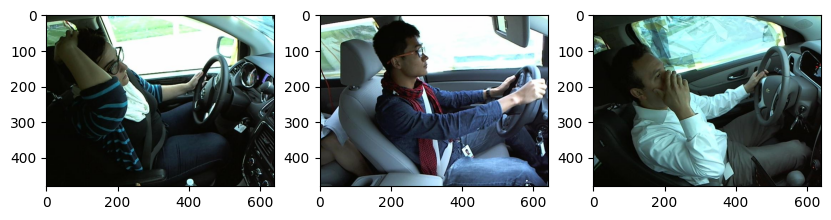

c9: look_away


<Figure size 640x480 with 0 Axes>

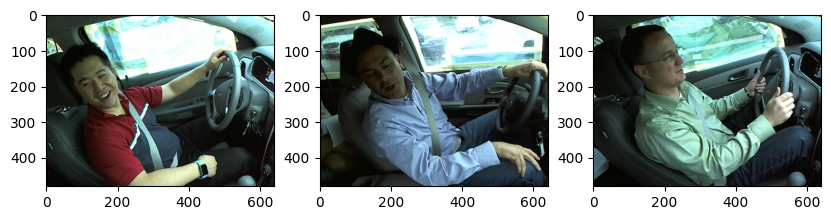

In [4]:
# Plot 3 images per class
classes = ['c' + str(x) for x in range(10)]
labels = ['focus', 'text_r', 'call_r', 'text_l', 'call_l', 'reach_fwd', 
          'drink', 'reach_bck', 'touch_face', 'look_away']

for i in range(10):
    img_class = classes[i]
    label = labels[i]
    print(f"{img_class}: {label}")
    
    class_dir = f'{train_data}{img_class}/'
    
    plt.figure()
    f, ax = plt.subplots(1, 3, figsize=(10, 10)) 
    ax[0].imshow(plt.imread(class_dir + os.listdir(class_dir)[0]))
    ax[1].imshow(plt.imread(class_dir + os.listdir(class_dir)[1]))
    ax[2].imshow(plt.imread(class_dir + os.listdir(class_dir)[2]))
    plt.show()


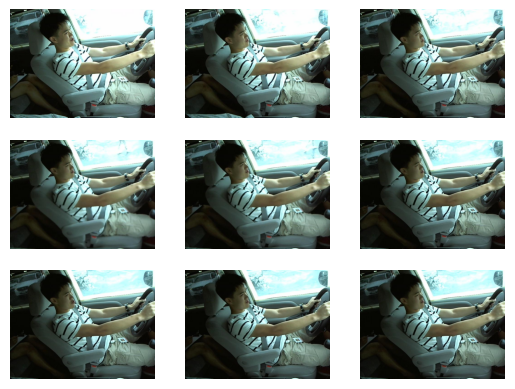

In [5]:
# Check batch for single driver
driver1 = drivers.loc[drivers['subject']=='p002', ]

for i in range(9):
    im_path = driver1.loc[i, 'img']
    label = driver1.loc[i, 'classname']
    img = plt.imread(f"{train_data}{label}/{im_path}")
    
    plt.subplot(3, 3, i+1)
    plt.imshow(img)
    plt.axis('off')
plt.show()

In [6]:
## Create driver batchs
driver_imgs = {}
for i, row in drivers.iterrows():
    driver = row['subject']
    img_path = row['img']
    if not driver_imgs.get(driver, False):
        driver_imgs[driver] = [img_path]
    else:
        driver_imgs[driver].append(img_path)

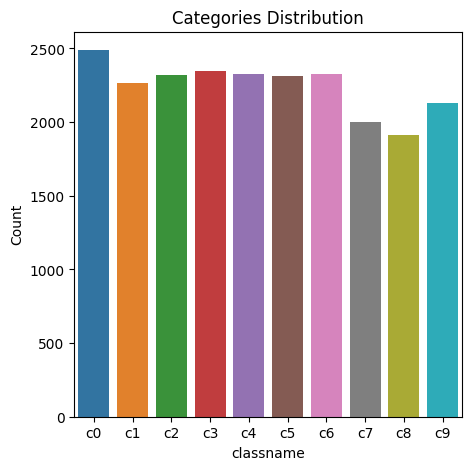

In [9]:
# Plot distribution of labels in train
plt.figure(figsize = (5,5))
sns.countplot(x = 'classname', data = drivers)
plt.ylabel('Count')
plt.title('Categories Distribution')
plt.show()

In [10]:
os.path.basename(img_path)

'img_9684.jpg'